# Looking at the boundary of instability for the m=0 case.

Today I want to look at the at the transition between stability and instability.
Specifically, I want to look at the m=0 case. Why does my code give a stable region behind the unstable region.

In [5]:
from __future__ import print_function, unicode_literals, division
from __future__ import absolute_import
from future import standard_library, utils
from future.builtins import (ascii, bytes, chr, dict, filter, hex, input,
                             int, map, next, oct, open, pow, range, round,
                             str, super, zip)

In [6]:
import numpy as np
import sys
sys.path.append('..')
import skin_core_scanner_simple as scs
reload(scs)
import equil_solver as es
reload(es)
import newcomb as new
reload(new)
import singularity_frobenius as sing_frob
reload(sing_frob)
import newcomb_init
reload(newcomb_init)
import newcomb_g
reload(newcomb_g)
import newcomb_f
reload(newcomb_f)
import lambda_k_plotting as plot
reload(plot)
import all_f_g
reload(all_f_g)
import external_stability as ext
reload(ext)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

# Looking at the Sausage Mode

### First I'll make a coarse stability map for m=0.

In [7]:
(lambda_a_mesh, k_a_mesh, 
 stability_maps) = scs.scan_lambda_k_space([0.01, 3.0, 10.], [0.01, 1.5, 10], epsilon=0.1,
                                           core_radius_norm=0.8, transition_width_norm=0.05, skin_width_norm=0.1)

('lambda_bar:', 0.01)
('lambda_bar:', 0.34222222222222226)


KeyboardInterrupt: 

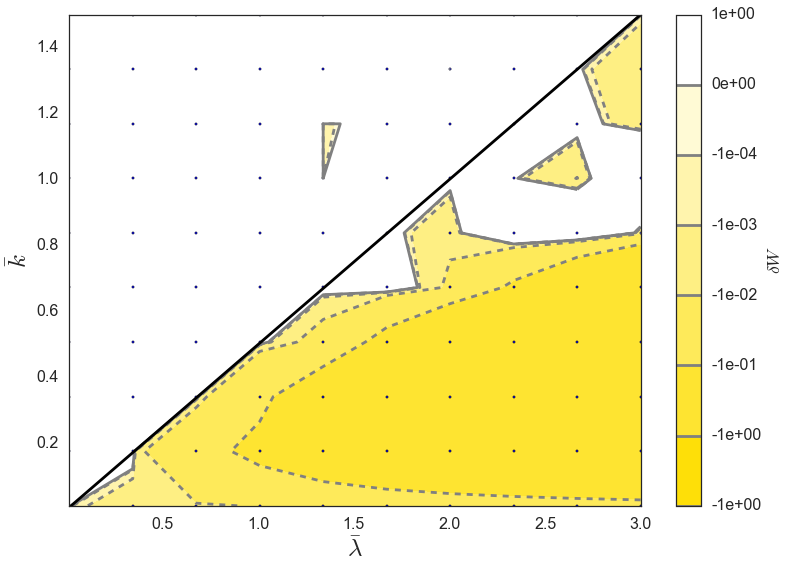

In [321]:
plot.plot_lambda_k_space_dw('../../output/2015-02-08-22-41/meshes.npz', 'ep12-m1', show_points=True, mode_to_plot='m_neg_1', levels=[-1.4, -1, -1e-1, -1e-2, -1e-3, -1e-4, 0, 1],
                            bounds=(1.5,3.0))

<matplotlib.colorbar.Colorbar instance at 0x0000000020151D48>

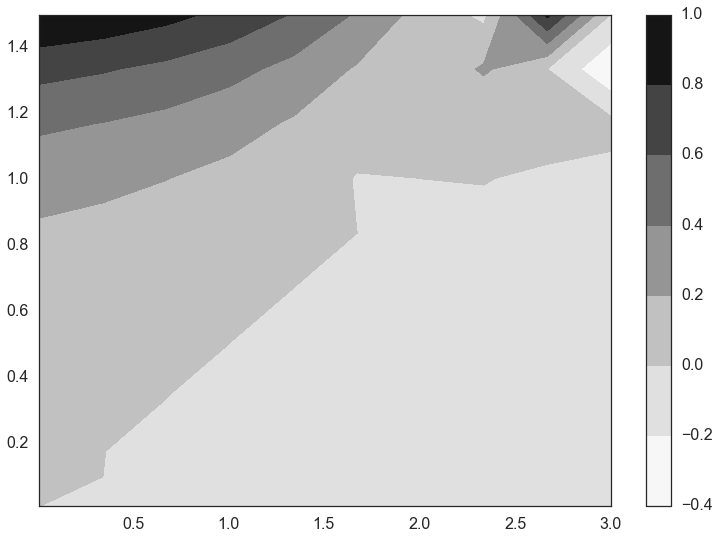

In [297]:
case = np.load('../../output/2015-02-08-21-45/meshes.npz')

delta_map = case['d_w_m_neg_1']
lambda_map = case['lambda_a_mesh']
k_map = case['k_a_mesh']

plt.contourf(lambda_map, k_map, delta_map)
plt.colorbar()

In [300]:
delta_map

array([[  1.00589855e-05,  -3.25298711e-04,  -6.63405325e-04,
         -1.00416181e-03,  -1.34758159e-03,  -1.69366690e-03,
         -2.04241825e-03,  -2.39383576e-03,  -2.74791950e-03,
         -3.10466931e-03],
       [  5.97211807e-03,   2.89539722e-04,  -5.89829489e-03,
         -1.22103024e-02,  -1.88554827e-02,  -2.58692801e-02,
         -3.32402257e-02,  -4.11723902e-02,  -5.34356410e-02,
         -5.13972126e-03],
       [  2.30625694e-02,   1.20712924e-02,   2.48560543e-04,
         -1.16993552e-02,  -2.39299561e-02,  -3.69578536e-02,
         -5.07251676e-02,  -6.54837101e-02,  -8.10990762e-02,
         -9.76639572e-02],
       [  5.30765175e-02,   3.71932882e-02,   1.81318174e-02,
          2.74879727e-04,  -1.71862950e-02,  -3.44217376e-02,
         -5.28942859e-02,  -7.28591650e-02,  -9.40557902e-02,
         -1.16262442e-01],
       [  1.00183936e-01,   7.93134241e-02,   5.38028465e-02,
          2.05103174e-02,   2.60968842e-04,  -2.09365239e-02,
         -4.20360242e-02

In [198]:
case = np.load('../../output/2015-02-07-23-06/meshes.npz')
delta_map = case['delta']
lambda_bar = case['lambda_a_mesh']
k_bar = case['k_a_mesh']
plt.contourf(lambda_bar, k_bar, delta_map)

KeyError: u'delta is not a file in the archive'

In [35]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=2.0033333333333334, k_bar=1.00333333333, epsilon=1.0, points_core=100, points_transition=250, points_skin=100)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [36]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, faf) = new.stability(np.linspace(0, 1, 10000)[1], 1E-3, 1E-3, 1000, params)

Profile is stable to mode k =  1.00333333333 m = 0.0
delta_W = 0.0723616382432


In [37]:
r_array

array([[  1.00000000e-03,   1.10001000e-03,   1.20002000e-03, ...,
          9.99899890e-01,   9.99999900e-01,   1.00000000e+00]])

<matplotlib.contour.QuadContourSet instance at 0x7fd44b427128>

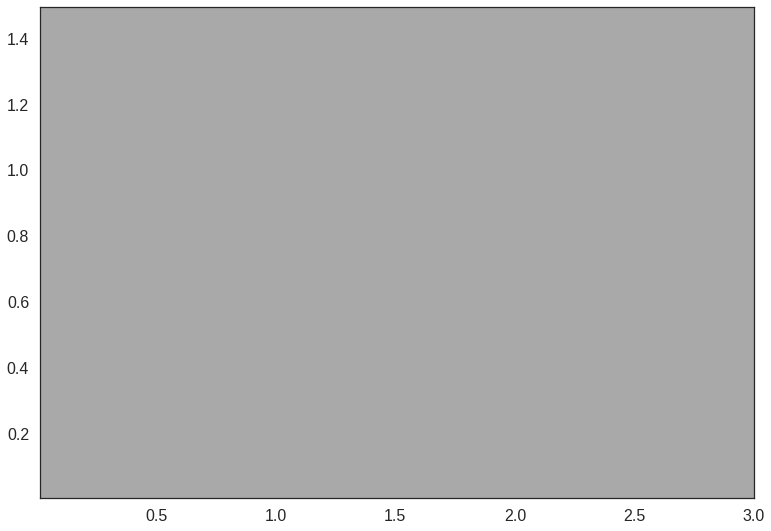

In [23]:
meshes = np.load('../../output/2015-01-24-16-01/meshes.npz')
internal_m_0 = meshes['internal_m_0']
lambda_mesh = meshes['lambda_a_mesh']
k_mesh = meshes['k_a_mesh']
plt.contourf(lambda_mesh, k_mesh, internal_m_0)

## The profiles becomes stable again at high $\bar{\lambda}$. Let's look at the left and right side of the stability bounday at $\bar{k}=0.2$.

### The unstable left side at $\bar{\lambda}$=3.0 and $\bar{k}$=0.2.

In [204]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=3., k_bar=0.2, epsilon=1.0)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [205]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, faf, all_f, all_g, all_g_terms) = new.stability(np.linspace(0, 1, 10000)[1], 1E-3, 1E-3, 1000, params)

Eigenfunction crosses zero near: [ 0.90819072]
Profile is stable to mode k =  0.2 m = 0.0
delta_W = 0.0399341407785


In [206]:
all_f = np.asarray(all_f)
all_f.size

474

In [207]:
all_g = np.asarray(all_g)
all_g.size

470

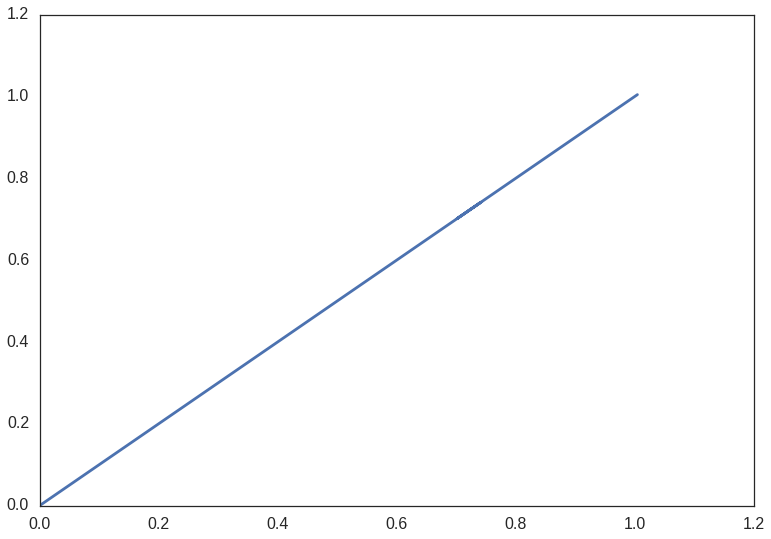

In [208]:
plt.plot(all_f[:,0], all_f[:,1])

In [209]:
all_g = np.asarray(all_g)
sorted_indexes = all_g[:,0].argsort() 
all_g = all_g[sorted_indexes]

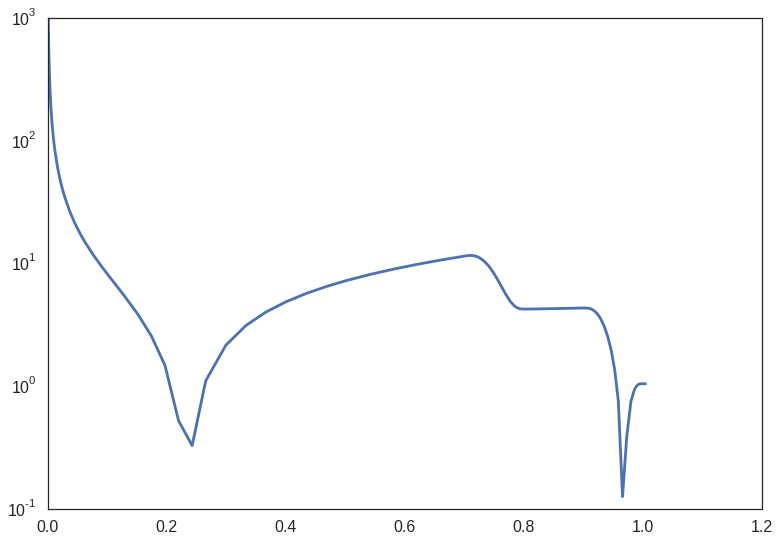

In [210]:
plt.semilogy(all_g[:,0], np.abs(all_g[:,1]))

In [211]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=0.2, k_bar=1.0, epsilon=1.0, points_core=2000, points_transition=5000, points_skin=2000)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [212]:
np.diff(profile.r)

array([  3.50175088e-04,   3.50175088e-04,   3.50175088e-04, ...,
         1.99960008e-05,   1.99960008e-05,   1.99960008e-05])

In [213]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, external_only, all_f, all_g, all_checks) = new.stability(np.diff(profile.r), 1E-3, 1E-3, 1000, params)

Profile is stable to mode k =  1.0 m = 0.0
delta_W = 2.4264344426


In [214]:
all_g = np.asarray(all_g)
sorted_indexes = all_g[:,0].argsort() 
all_g = all_g[sorted_indexes]

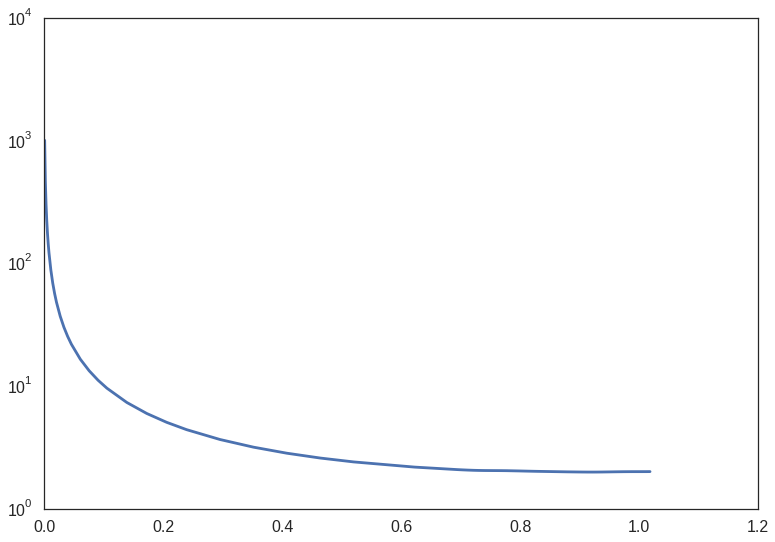

In [215]:
plt.semilogy(all_g[:,0], np.abs(all_g[:,1]))

In [216]:
pressure_prime = np.asarray(all_checks['pressure_prime'])
arg = np.argsort(pressure_prime[:,0])
pressure_prime = pressure_prime[arg]

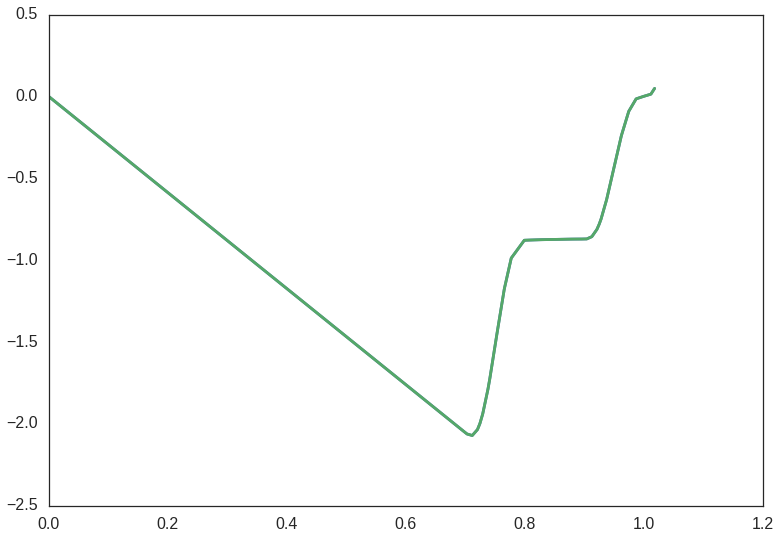

In [217]:
pressure_prime = np.asarray(all_checks['pressure_prime'])
arg = np.argsort(pressure_prime[:,0])
pressure_prime = pressure_prime[arg]
plt.plot(pressure_prime[:,0], pressure_prime[:,1])
plt.plot(pressure_prime[:,0], profile.get_splines()['p_prime'](pressure_prime[:,0]))

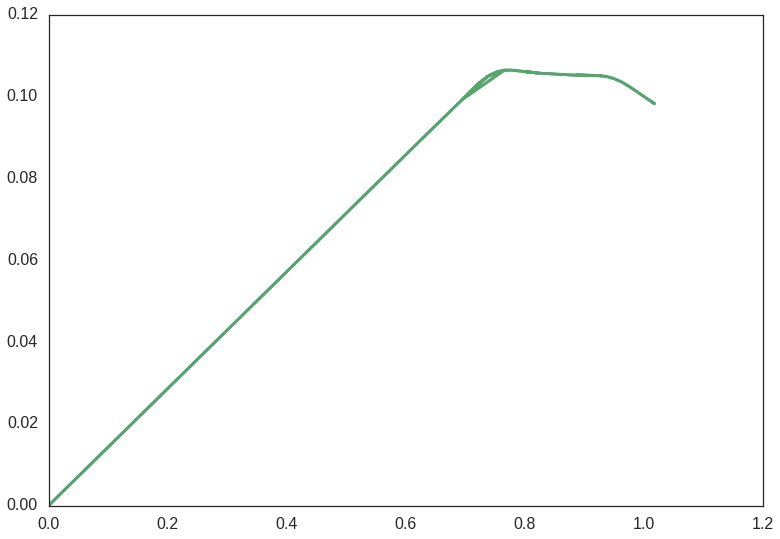

In [218]:
b_theta = np.asarray(all_checks['b_theta'])
arg = np.argsort(b_theta[:,0])
pressure_prime = b_theta[arg]
plt.plot(b_theta[:,0], b_theta[:,1])
plt.plot(b_theta[:,0], profile.get_splines()['b_theta'](b_theta[:,0]))

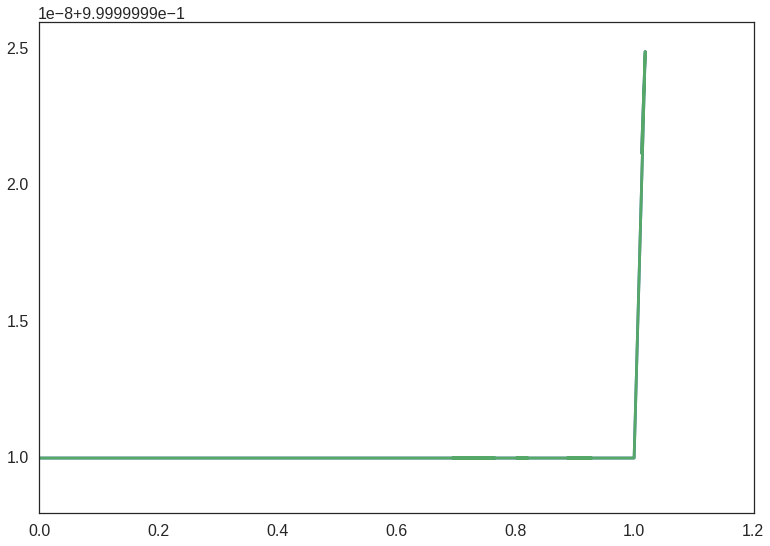

In [219]:
b_z = np.asarray(all_checks['b_z'])
arg = np.argsort(b_z[:,0])
pressure_prime = b_z[arg]
plt.plot(b_z[:,0], b_z[:,1])
plt.plot(b_z[:,0], profile.get_splines()['b_z'](b_z[:,0]))

In [220]:
all_g_terms = all_checks['g_terms']
all_g_term1 = np.asarray(all_g_terms[0])
all_g_term2 = np.asarray(all_g_terms[1])
all_g_term3 = np.asarray(all_g_terms[2])
all_g_term4 = np.asarray(all_g_terms[3])
all_g_term5 = np.asarray(all_g_terms[4])
all_g_term6 = np.asarray(all_g_terms[5])

sorted_indexes = all_g_term1[:,0].argsort()
all_g_term1 = all_g_term1[sorted_indexes]

sorted_indexes = all_g_term2[:,0].argsort()
all_g_term2 = all_g_term2[sorted_indexes]

sorted_indexes = all_g_term3[:,0].argsort()
all_g_term3 = all_g_term3[sorted_indexes]

sorted_indexes = all_g_term4[:,0].argsort()
all_g_term4 = all_g_term4[sorted_indexes]

sorted_indexes = all_g_term5[:,0].argsort()
all_g_term5 = all_g_term5[sorted_indexes]

sorted_indexes = all_g_term6[:,0].argsort()
all_g_term6 = all_g_term6[sorted_indexes]

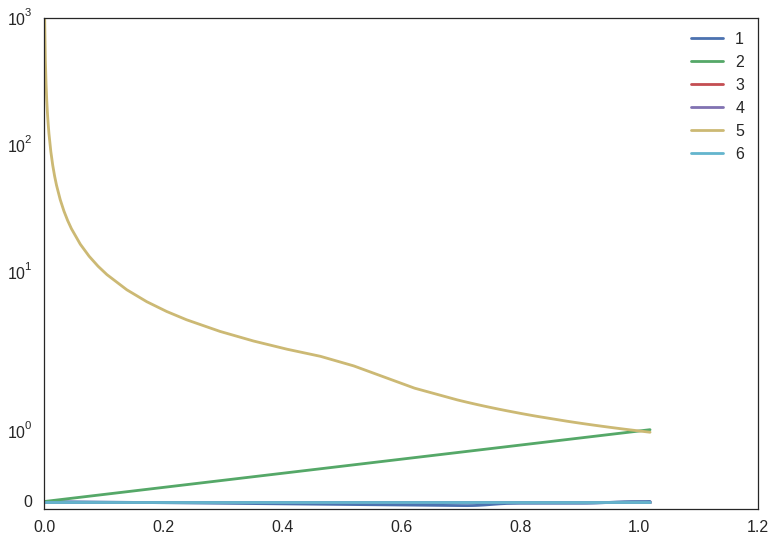

In [194]:
plt.semilogy(all_g_term1[:,0], all_g_term1[:,1])
plt.semilogy(all_g_term1[:,0], all_g_term2[:,1])
plt.semilogy(all_g_term1[:,0], all_g_term3[:,1])
plt.semilogy(all_g_term1[:,0], all_g_term4[:,1])
plt.semilogy(all_g_term1[:,0], all_g_term5[:,1])
plt.semilogy(all_g_term1[:,0], all_g_term6[:,1])
plt.yscale('symlog')
plt.legend(['1', '2', '3', '4', '5', '6'])

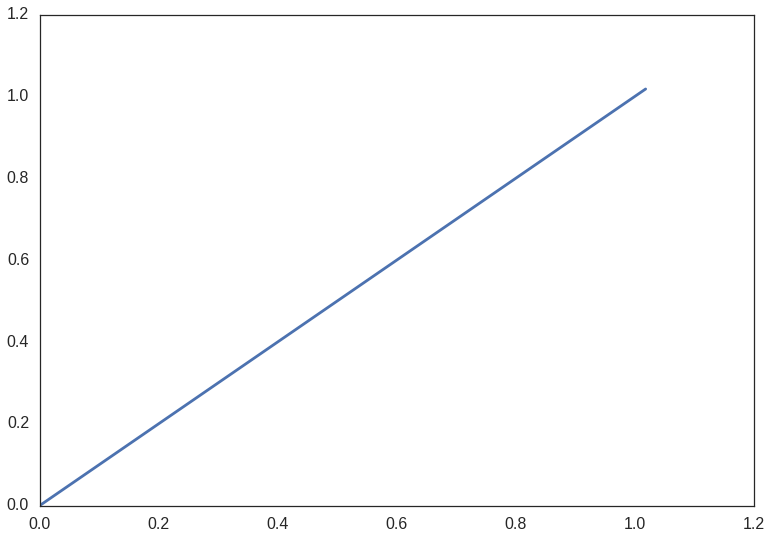

In [195]:
plt.plot(all_g_term1[:,0], all_g_term2[:,1,])

### Now I'll plot the eigenfunction $\xi$ and it's derivative $\xi'$

/home/jensv/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


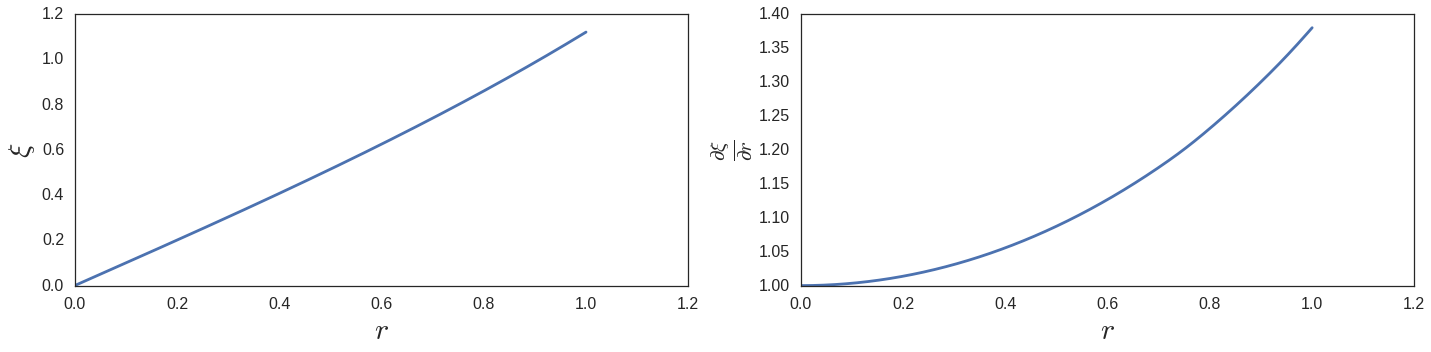

In [196]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
fig.set_label('$\epsilon = 0.8$ $\bar{\lambda}=$ $\bar{\k}=$ $k=0.5$ $m=-1$ $C=1$')
axs[0].plot(r_array[-1], xi[-1])
axs[0].set_xlabel(r'$r$', fontsize=30)
axs[0].set_ylabel(r'$\xi$', fontsize=30)
axs[1].plot(r_array[-1], xi_der[-1])
axs[1].set_xlabel(r'$r$', fontsize=30)
axs[1].set_ylabel(r'$\frac{\partial \xi}{\partial r}$', fontsize=30)
fig.tight_layout()
fig.show()

## The unstable left side at $\bar{\lambda}$=2.66 and $\bar{k}$=0.2.

In [196]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=2.667, k_bar=0.2, epsilon=1.0)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [197]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, delta_w, residual_array, external_only) = new.stability(np.linspace(0, 1, 10000)[1], 1E-3, 1E-3, 1000, params, atol=1E-20)

Profile is unstable to external mode k = 0.2 m = 0.0
delta_W = -0.0253040429891


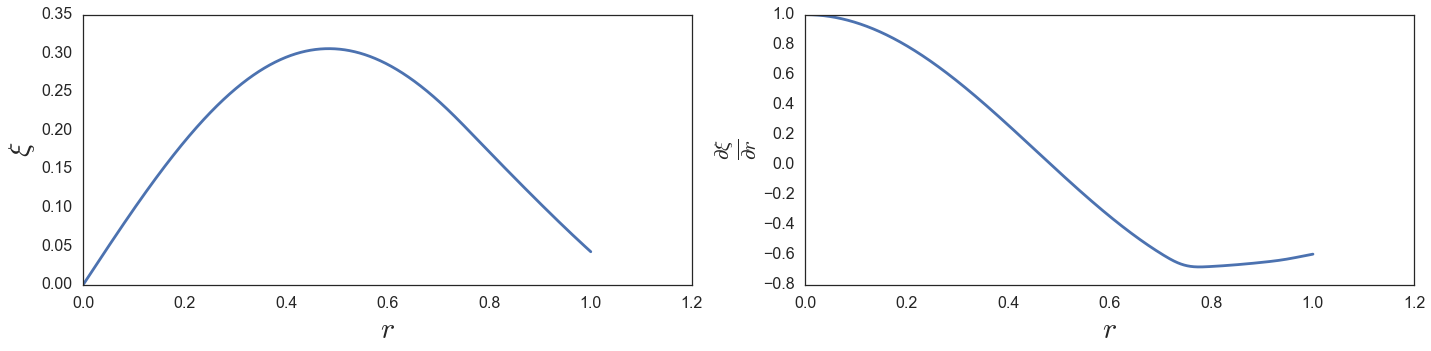

In [198]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
fig.set_label('$\epsilon = 0.8$ $\bar{\lambda}=$ $\bar{\k}=$ $k=0.5$ $m=-1$ $C=1$')
axs[0].plot(r_array[-1], xi[-1])
axs[0].set_xlabel(r'$r$', fontsize=30)
axs[0].set_ylabel(r'$\xi$', fontsize=30)
axs[1].plot(r_array[-1], xi_der[-1])
axs[1].set_xlabel(r'$r$', fontsize=30)
axs[1].set_ylabel(r'$\frac{\partial \xi}{\partial r}$', fontsize=30)
fig.tight_layout()
fig.show()

## Let's look at the other instability boundary at low $\lambda$.

### The unstable left side at $\bar{\lambda}$=0.667 and $\bar{k}$=0.2.

In [199]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=0.667, k_bar=0.2, epsilon=1.0)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [200]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, external_only) = new.stability(np.linspace(0, 1, 10000)[1], 1E-3, 1E-3, 1000, params)

Profile is stable to mode k =  0.2 m = 0.0
delta_W = 0.798984086309


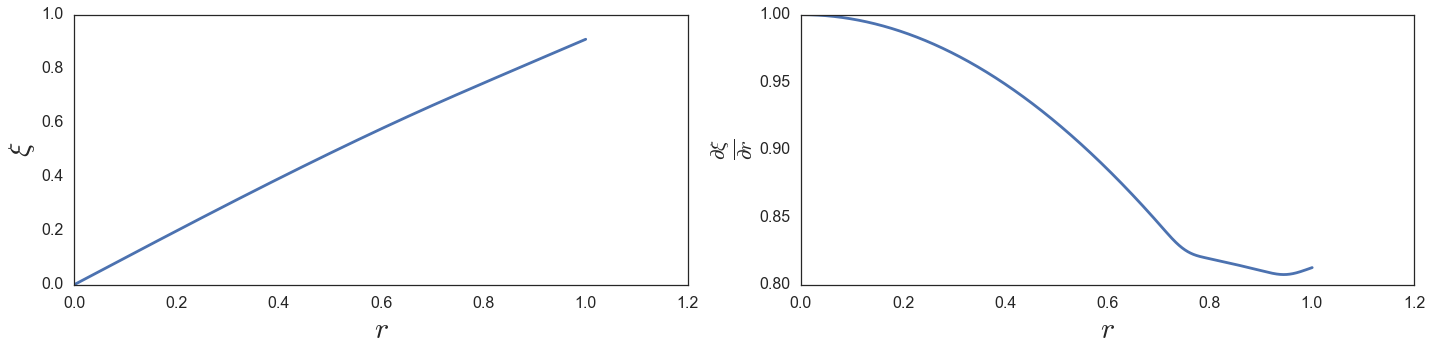

In [201]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
fig.set_label('$\epsilon = 0.8$ $\bar{\lambda}=$ $\bar{\k}=$ $k=0.5$ $m=-1$ $C=1$')
axs[0].plot(r_array[-1], xi[-1])
axs[0].set_xlabel(r'$r$', fontsize=30)
axs[0].set_ylabel(r'$\xi$', fontsize=30)
axs[1].plot(r_array[-1], xi_der[-1])
axs[1].set_xlabel(r'$r$', fontsize=30)
axs[1].set_ylabel(r'$\frac{\partial \xi}{\partial r}$', fontsize=30)
fig.tight_layout()
fig.show()

### The unstable left side at $\bar{\lambda}$=1 and $\bar{k}$=0.2.

In [204]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=1., k_bar=0.2, epsilon=1.0)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [205]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, external_only) = new.stability(np.linspace(0, 1, 10000)[1], 1E-3, 1E-3, 1000, params, atol=1E-10)

Profile is stable to mode k =  0.2 m = 0.0
delta_W = 0.512454812743


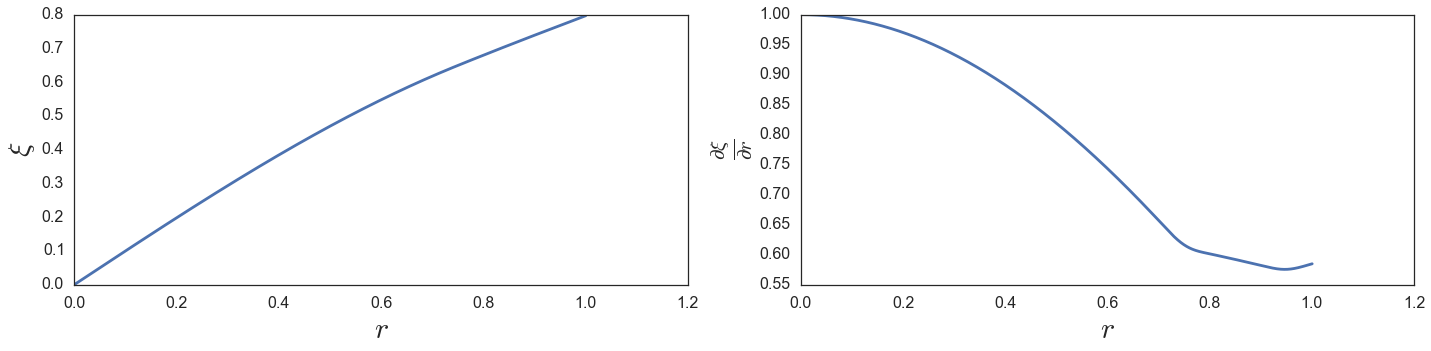

In [206]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
fig.set_label('$\epsilon = 0.8$ $\bar{\lambda}=$ $\bar{\k}=$ $k=0.5$ $m=-1$ $C=1$')
axs[0].plot(r_array[-1], xi[-1])
axs[0].set_xlabel(r'$r$', fontsize=30)
axs[0].set_ylabel(r'$\xi$', fontsize=30)
axs[1].plot(r_array[-1], xi_der[-1])
axs[1].set_xlabel(r'$r$', fontsize=30)
axs[1].set_ylabel(r'$\frac{\partial \xi}{\partial r}$', fontsize=30)
fig.tight_layout()
fig.show()

### For reference let's look at the kink mode m=1 $\bar{\lambda}$=0.1 and $\bar{k}$=0.2.

In [210]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=1, k_bar=0.2, epsilon=1.0)
params = {'m': 1., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [211]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, external_only) = new.stability(np.linspace(0, 1, 10000)[1], 1E-3, 1E-3, 1000, params, atol=1E-10)

Non-geometric singularties identified at r = [ 0.]
Profile is unstable to external mode k = 0.2 m = 1.0
delta_W = -0.0183059773039


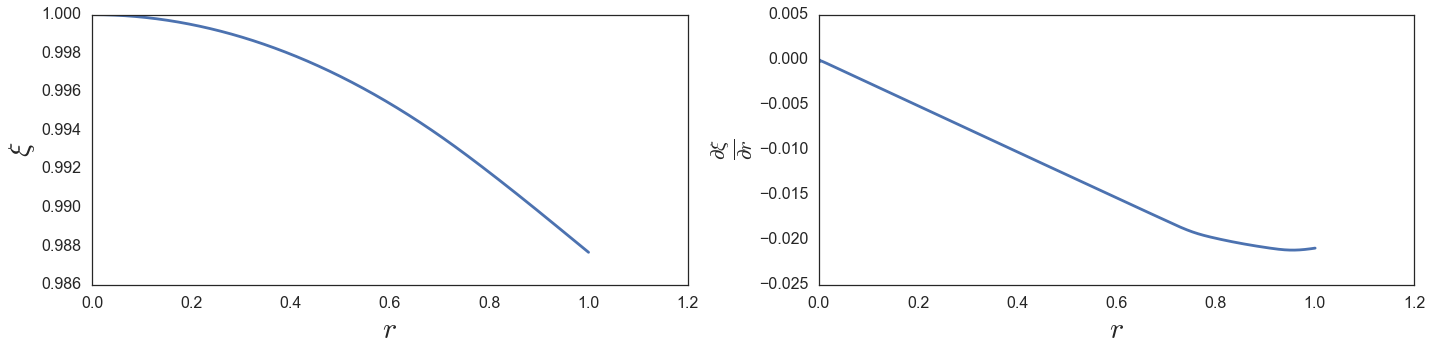

In [212]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
fig.set_label('$\epsilon = 0.8$ $\bar{\lambda}=$ $\bar{\k}=$ $k=0.5$ $m=-1$ $C=1$')
axs[0].plot(r_array[-1], xi[-1])
axs[0].set_xlabel(r'$r$', fontsize=30)
axs[0].set_ylabel(r'$\xi$', fontsize=30)
axs[1].plot(r_array[-1], xi_der[-1])
axs[1].set_xlabel(r'$r$', fontsize=30)
axs[1].set_ylabel(r'$\frac{\partial \xi}{\partial r}$', fontsize=30)
fig.tight_layout()
fig.show()

### There seems to be a pattern here. There is always a large drop in the derivative. Maybe the initial condition is not matching well. 

### Look at the the initial conditions, are they consistent with the ODE system?

### The Euler-Lagrange ODE is $(f\xi')'-g\xi=0$.

### The ODE is singular at r=0, because $f(r=0)=0$, where $f=\frac{r(rkB_{z}+mB_{\theta})}{r^2 k^2+m^2}$.

### The initial condition close to $r=0$ is determined by a Frobenius expansion.

### I took the initial condition from Goedbloed's book:

### For $m=\pm1$:  $$\xi \propto r^{|m|-1} = r^{0} = 1$$ $$\xi' \propto (|m|-1) r^{|m|-2} = 0$$

### For $m=0$:  $$\xi \propto r$$ $$\xi' \propto 1$$  Effectively, that a kink perturbs the axis of the plasma cylinder, while the sausage does not.

### The correct initial condition should fulfil the Euler Lagrange equation. If I plug the values for $f$, $g$, $\xi$, and $\xi'$ into the $f' \xi' + f \xi'' - g \xi$ the residual should be zero, small.

In [227]:
from newcomb_f import f_prime as f_prime_func
from newcomb_f import newcomb_f_16 as f_func
from newcomb_g import newcomb_g_18_dimless as g_func

In [228]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=2.33, k_bar=0.2, epsilon=1.0)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [229]:
r = 1E-3

In [230]:
def euler_lagrange_params(params, r):
    r"""
    Set up params to evalute f and g at r.
    """
    f_params = {'r': r, 'k': params['k'], 'm': params['m'], 'b_z': params['b_z'](r),
                'b_theta': params['b_theta'](r), 'q': params['q'](r)}
    g_params = {'r': r, 'k': params['k'], 'm': params['m'], 'b_z': params['b_z'](r),
                'b_z_prime': params['b_z'].derivative()(r),
                'b_theta': params['b_theta'](r),
                'b_theta_prime': params['b_theta'].derivative()(r),
                'p_prime': params['p_prime'](r), 'q': params['q'](r),
                'q_prime': params['q'].derivative()(r),
                'beta_0': params['beta_0']}
    return f_params, g_params

In [231]:
def euler_lagrange_difference(r, f_params, g_params, xi, xi_prime, xi_prime_prime):
    r"""
    return difference of euler-lagrange 
    """
    f_prime = f_prime_func(**g_params)
    f = f_func(**f_params)
    g = g_func(**g_params)
    return f_prime*xi_prime + f*xi_prime_prime - g*xi


In [232]:
def is_euler_lagrange_zero(r, params):
    r"""
    """
    f_params, g_params = euler_lagrange_params(params, r)
    xi = xi_assumption(r, params['m'])
    xi_prime = xi_prime_assumption(r, params['m'])
    xi_prime_prime = xi_prime_prime_assumption(r, params['m'])
    difference = euler_lagrange_difference(r, f_params, g_params, xi, xi_prime, xi_prime_prime)
    return difference

### Residual at r=0 for the m=0

In [233]:
def xi_assumption(r, m):
    return r
def xi_prime_assumption(r, m):
    return 1.
def xi_prime_prime_assumption(r, m):
    return 0.

In [234]:
is_euler_lagrange_zero(r, params)

-1.9989889605273845

### Residual at r=0 for the m=1

In [235]:
def xi_assumption(r, m):
    return 1.
def xi_prime_assumption(r, m):
    return 0.
def xi_prime_prime_assumption(r, m):
    return 0.

In [236]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=2.33, k_bar=0.2, epsilon=1.0)
params = {'m': 1., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [237]:
is_euler_lagrange_zero(r, params)

5.2254492741092766e-10

### Next I want to look at the residual for all of r.

### However, in my code I do not calculate $\xi''$. For now I will just approximate the derivative by taking differences:  $$\xi''(r) = \frac{\xi''(r+h) - \xi''(r)}{h}$$  My residuals will be inaccurate.

In [197]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=2.33, k_bar=0.2, epsilon=1.0, points_core=500, points_transition=500, points_skin=500)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [198]:
(stable_internal, suydam_stable, stable_external, 
 xi, xi_der, r_array, residual_array, delta_w, 
 missing_end_params, all_f, all_g, all_g_terms) = new.stability(np.linspace(0, 1, 10000)[1], 1E-2, 1E-2, 1000, params)

Profile is unstable to external mode k = 0.2 m = 0.0
delta_W = -0.0796539052147


In [199]:
r_array.shape

(1, 9901)

In [200]:
residual_array.shape

(1, 9900)

### Residual for an m=0 integration

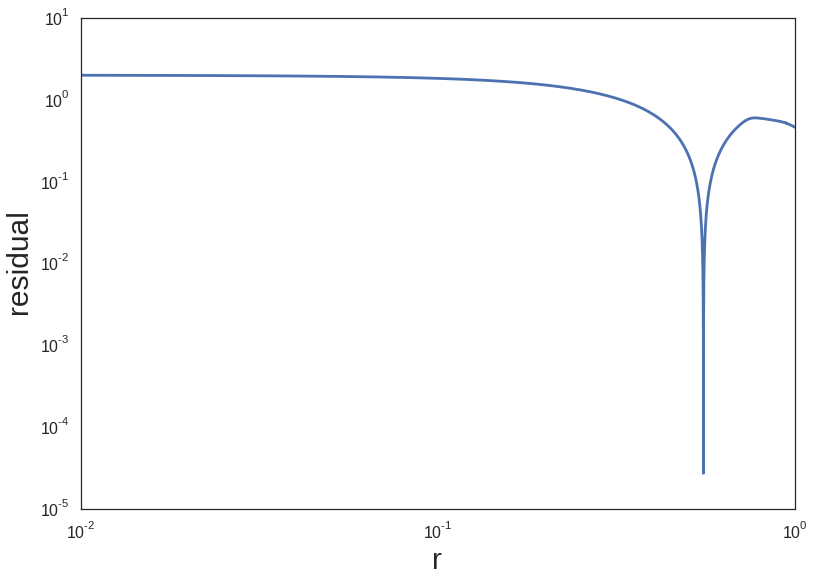

In [201]:
plt.loglog(r_array[-1., 1:], np.abs(residual_array[-1]))
plt.ylabel('residual', fontsize=30)
plt.xlabel('r', fontsize=30)
plt.yscale('log')
plt.show()

In [166]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=2.33, k_bar=0.2, epsilon=1.0)
params = {'m': -1., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1.})

In [167]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, external_only, all_f, all_g, all_cases) = new.stability(np.linspace(0, 1, 10000)[1], 1E-3, 1E-3, 1000, params)

Non-geometric singularties identified at r = [ 0.]
Profile is unstable to external mode k = 0.2 m = -1.0
delta_W = -2.19536334604


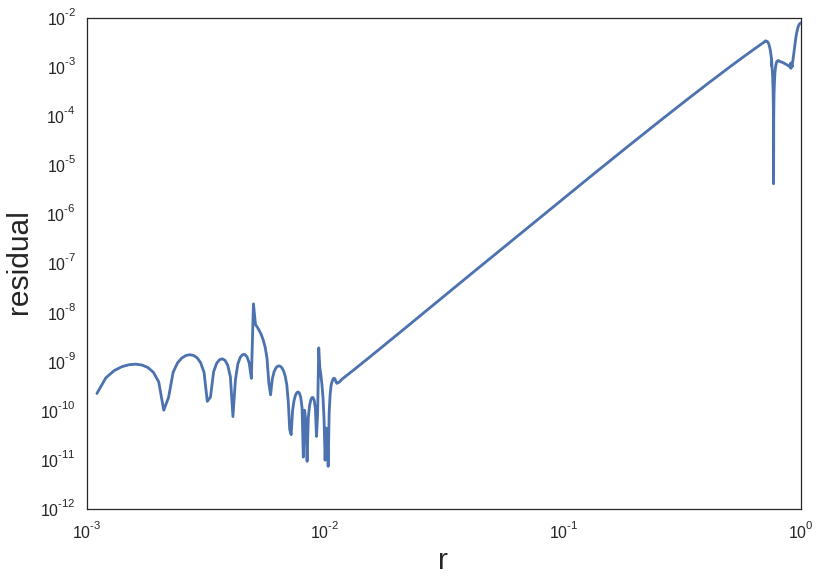

In [168]:
plt.loglog(r_array[-1, 1:], np.abs(residual_array)[-1])
plt.ylabel('residual', fontsize=30)
plt.xlabel('r', fontsize=30)
plt.show()

## As suggested in last meeting starting at r=0.5

In [325]:
(lambda_a_mesh, k_a_mesh, 
 stability_maps) = scs.scan_lambda_k_space([0.01, 6., 10], [0.01, 1.5, 10], xi_factor=1.0, 
                                           magnetic_potential_energy_ratio=1.0, epsilon=1.0, 
                                           r_0=0.5)

('lambda_bar:', 0.01)
('lambda_bar:', 0.67555555555555558)
('lambda_bar:', 1.3411111111111111)
('lambda_bar:', 2.0066666666666664)
('lambda_bar:', 2.6722222222222221)
('lambda_bar:', 3.3377777777777777)
('lambda_bar:', 4.003333333333333)
('lambda_bar:', 4.6688888888888886)
('lambda_bar:', 5.3344444444444443)
('lambda_bar:', 6.0)
Saved in Directory:2015-01-23-10-10


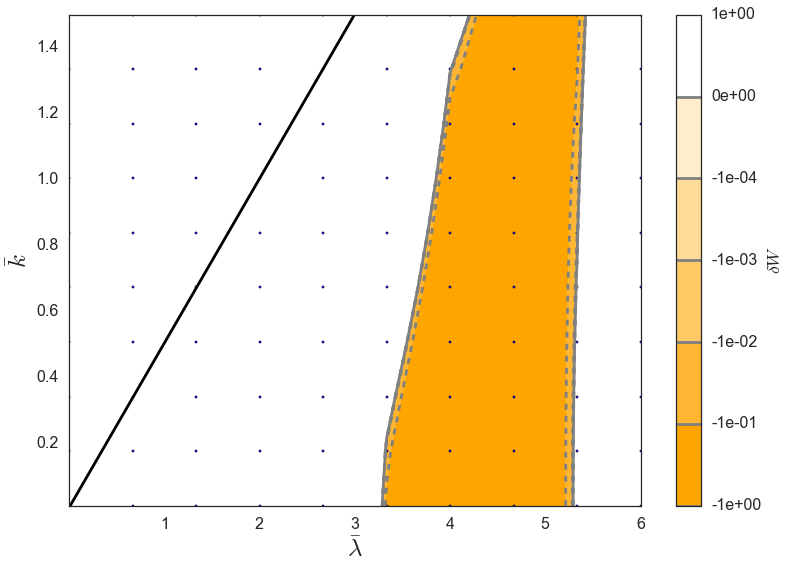

In [327]:
plot.plot_lambda_k_space_dw('../../output/2015-01-23-10-10/meshes.npz', 'ep12-m1', show_points=True, mode_to_plot='m_0', levels=[-1, -1e-1, -1e-2, -1e-3, -1e-4, 0, 1],
                            bounds=(1.5,6.0))

## Let's look the right side of the high $\lambda$ transition: $\lambda = 5.5$ and $k=0.2$

In [328]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=5.5, k_bar=0.2, epsilon=1.0)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1., 'r_0':0.5})

In [329]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, external_only) = new.stability(np.linspace(0, 1, 10000)[1], 1e-3, 1e-3, 1000, params)

Eigenfunction crosses zero near: [ 0.50010001  0.96734673]
Profile is stable to mode k =  0.2 m = 0.0
delta_W = 0.00699079219013


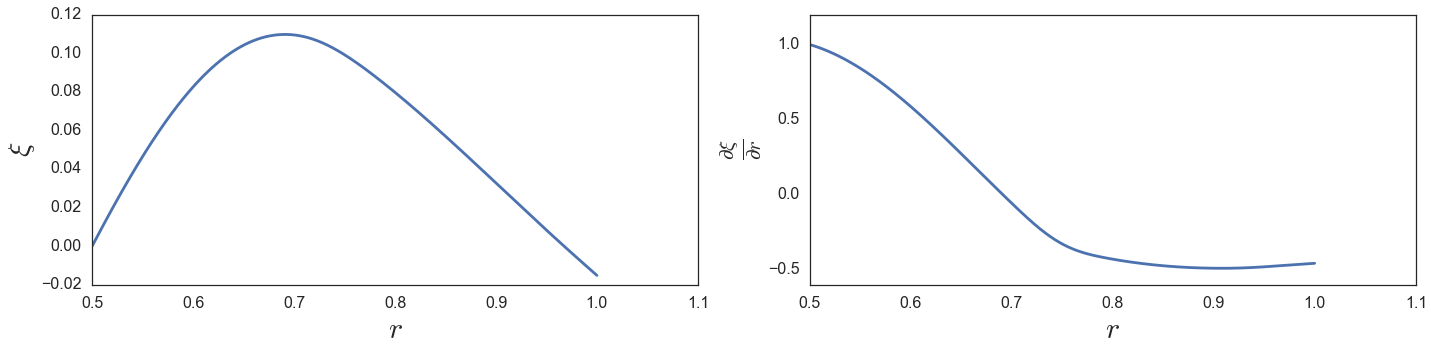

In [330]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
fig.set_label('$\epsilon = 0.8$ $\bar{\lambda}=$ $\bar{\k}=$ $k=0.5$ $m=-1$ $C=1$')
axs[0].plot(r_array[-1], xi[-1])
axs[0].set_xlabel(r'$r$', fontsize=30)
axs[0].set_ylabel(r'$\xi$', fontsize=30)
axs[1].plot(r_array[-1], xi_der[-1])
axs[1].set_xlabel(r'$r$', fontsize=30)
axs[1].set_ylabel(r'$\frac{\partial \xi}{\partial r}$', fontsize=30)
fig.tight_layout()
fig.show()

## Let's look the left side of the high $\lambda$ transition: $\lambda = 4.5$ and $k=0.2$

In [342]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=4.5, k_bar=0.2, epsilon=1.0)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1., 'r_0':0.5})

In [343]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, external_only) = new.stability(np.linspace(0, 1, 10000)[1], 1e-3, 1e-3, 1000, params)

Eigenfunction crosses zero near: [ 0.50010001]
Profile is unstable to external mode k = 0.2 m = 0.0
delta_W = -0.0210578552594


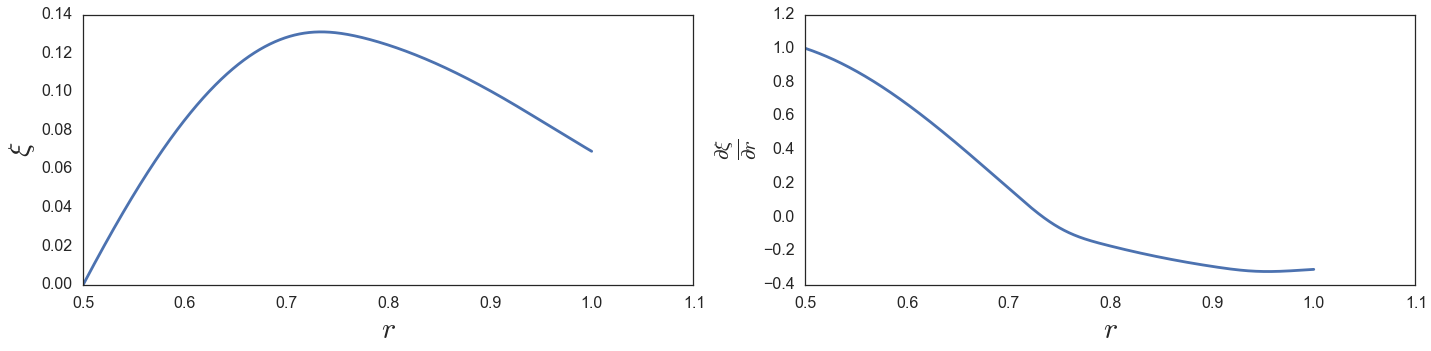

In [344]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
fig.set_label('$\epsilon = 0.8$ $\bar{\lambda}=$ $\bar{\k}=$ $k=0.5$ $m=-1$ $C=1$')
axs[0].plot(r_array[-1], xi[-1])
axs[0].set_xlabel(r'$r$', fontsize=30)
axs[0].set_ylabel(r'$\xi$', fontsize=30)
axs[1].plot(r_array[-1], xi_der[-1])
axs[1].set_xlabel(r'$r$', fontsize=30)
axs[1].set_ylabel(r'$\frac{\partial \xi}{\partial r}$', fontsize=30)
fig.tight_layout()
fig.show()

## Now looking at the residual

In [3]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=4.5, k_bar=0.2, epsilon=1.0)
params = {'m': 0., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1., 'r_0':0.5})

In [4]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, external_only) = new.stability(np.linspace(0, 1, 10000)[1], 1E-3, 1E-3, 1000, params, init_value=(0.0, 1.0))

Eigenfunction crosses zero near: [ 0.50010001]
Profile is unstable to external mode k = 0.2 m = 0.0
delta_W = -0.0210578552594


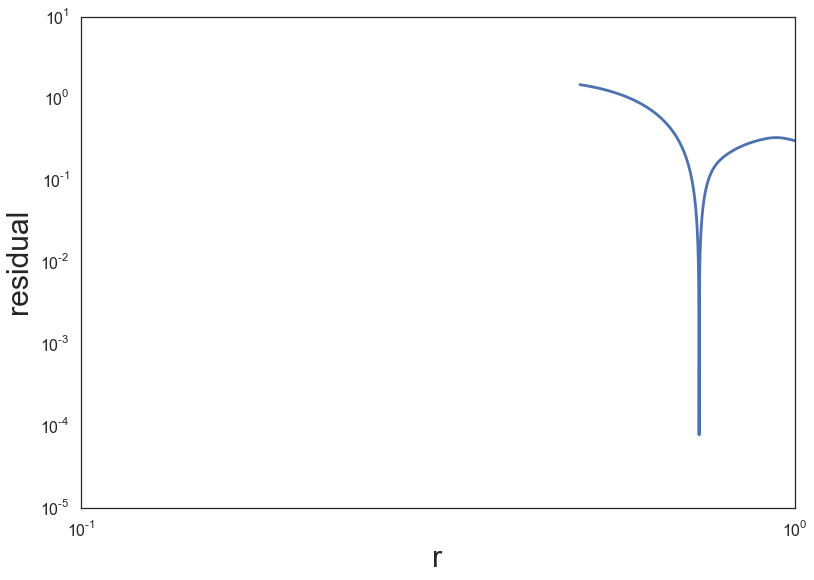

In [5]:
plt.loglog(r_array[-1, 1:], np.abs(residual_array))
plt.ylabel('residual', fontsize=30)
plt.xlabel('r', fontsize=30)
plt.yscale('log')
plt.show()

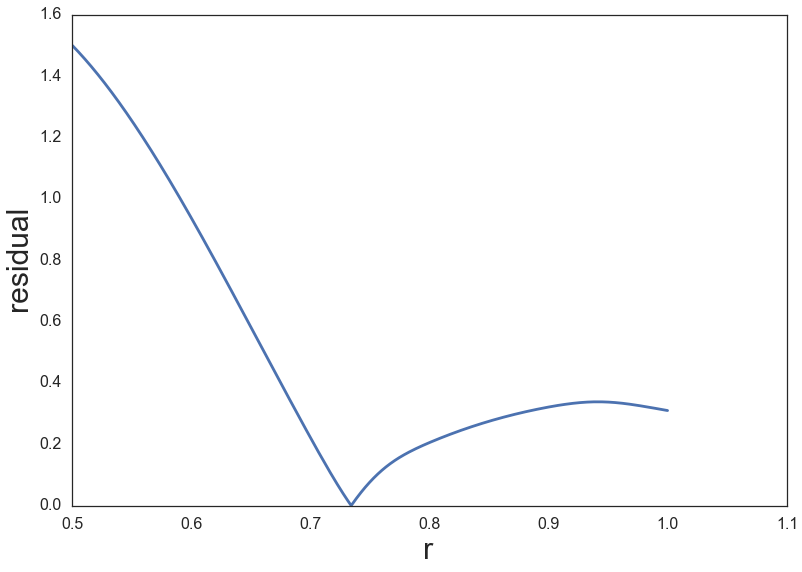

In [6]:
plt.plot(r_array[-1, 1:], np.abs(residual_array))
plt.ylabel('residual', fontsize=30)
plt.xlabel('r', fontsize=30)
plt.show()

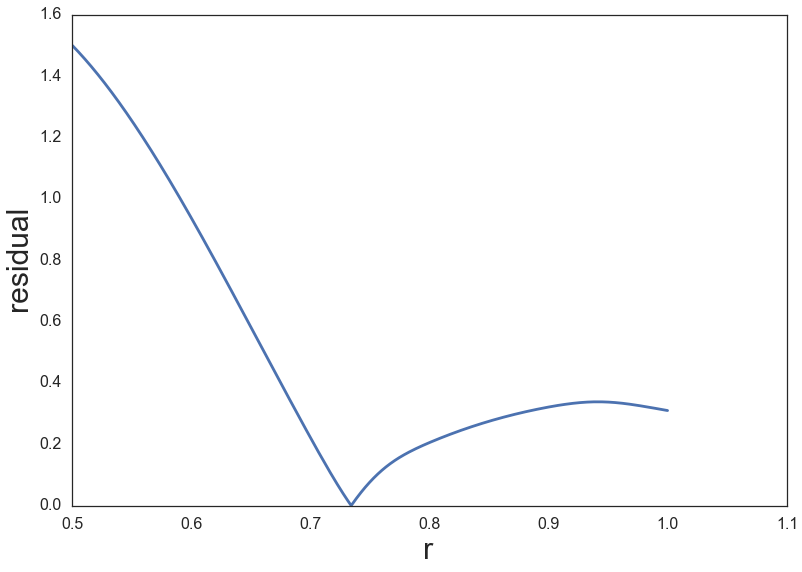

In [352]:
plt.plot(r_array[-1, 1:], np.abs(residual_array))
plt.ylabel('residual', fontsize=30)
plt.xlabel('r', fontsize=30)
plt.show()

In [15]:
profile5_5 = es.UnitlessSmoothedCoreSkin(lambda_bar=5.5, k_bar=0.2, epsilon=1.0)

In [16]:
profile4_5 = es.UnitlessSmoothedCoreSkin(lambda_bar=4.5, k_bar=0.2, epsilon=1.0)

In [26]:
profile6 = es.UnitlessSmoothedCoreSkin(lambda_bar=6.5, k_bar=0.2, epsilon=1.0)

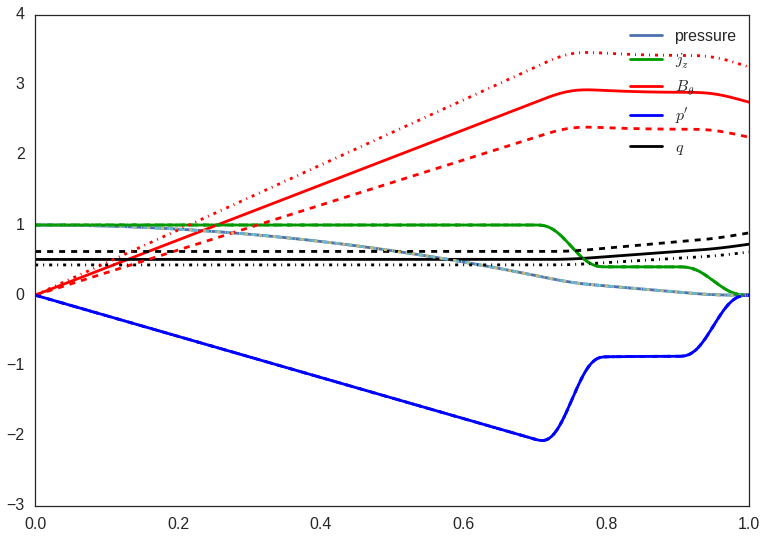

In [27]:
r = np.linspace(0, 1., 250)
plt.plot(r, profile5_5.get_splines()['pressure'](r))
plt.plot(r, profile5_5.get_splines()['j_z'](r), c='#009900')
plt.plot(r, profile5_5.get_splines()['b_theta'](r), c='#FF0000')
plt.plot(r, profile5_5.get_splines()['p_prime'](r), c='#0000FF')
plt.plot(r, 10*profile5_5.get_splines()['q'](r), c='#000000')
plt.plot(r, profile4_5.get_splines()['pressure'](r), '--')
plt.plot(r, profile4_5.get_splines()['j_z'](r), '--', c='#009900')
plt.plot(r, profile4_5.get_splines()['b_theta'](r), '--', c='#FF0000')
plt.plot(r, profile4_5.get_splines()['p_prime'](r), '--', c='#0000FF')
plt.plot(r, 10*profile4_5.get_splines()['q'](r), '--', c='#000000')
plt.plot(r, profile6.get_splines()['pressure'](r), '-.')
plt.plot(r, profile6.get_splines()['j_z'](r), '-.', c='#009900')
plt.plot(r, profile6.get_splines()['b_theta'](r), '-.', c='#FF0000')
plt.plot(r, profile6.get_splines()['p_prime'](r), '-.', c='#0000FF')
plt.plot(r, 10*profile6.get_splines()['q'](r), '-.', c='#000000')
plt.legend([r'pressure', r'$j_z$', r'$B_{\theta}$', r"$p'$", '$q$'])
plt.show()

In [23]:
10*profile6.get_splines()['q'](r)[0] - 10*profile5_5.get_splines()['q'](r)[0]

-0.04242408006067544

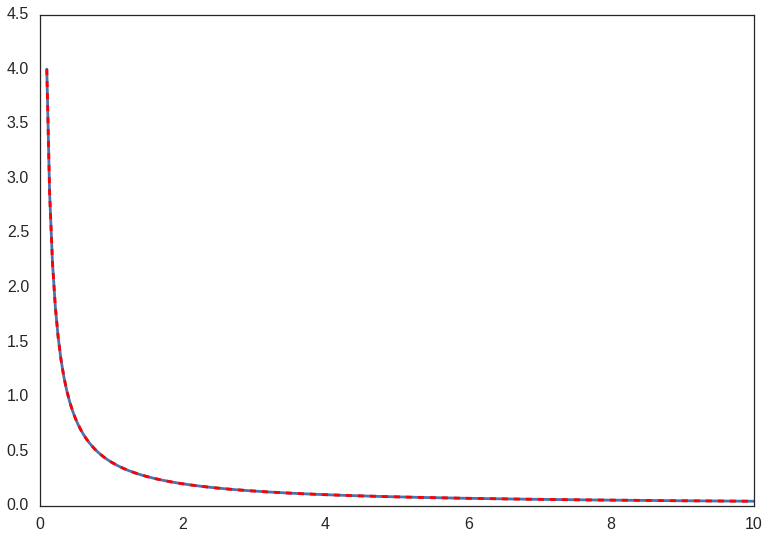

In [32]:
lambda_bars = np.linspace(0.1, 10, 250)
qs = np.empty(lambda_bars.size)
for i, lambda_bar in enumerate(lambda_bars):
    profile = es.UnitlessSmoothedCoreSkin(lambda_bar=lambda_bar, k_bar=0.2, epsilon=1.0)
    qs[i] = profile.get_splines()['q'](1.)
plt.plot(lambda_bars, qs)
plt.plot(lambda_bars, 0.2*2/(lambda_bars), '--', c='red')

## For comparison the residual of the $m=1$ mode

In [353]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=5., k_bar=0.2, epsilon=1.0)
params = {'m': 1., 'k': profile.k_bar, 'r_0': 0., 'a': 1., 'b': 'infinity', 'beta_0': profile.get_splines()['beta'](0)}
params.update(profile.get_splines())
params.update({'xi_factor': 1., 'magnetic_potential_energy_ratio': 1., 'r_0':0.5})

In [354]:
(stable_internal, suydam_stable, stable_external, xi, xi_der, r_array, residual_array, delta_w, external_only) = new.stability(np.linspace(0, 1, 10000)[1], 1E-3, 1E-3, 1000, params, init_value=(1.0, 0.0))

Profile is unstable to external mode k = 0.2 m = 1.0
delta_W = -28.9190657869


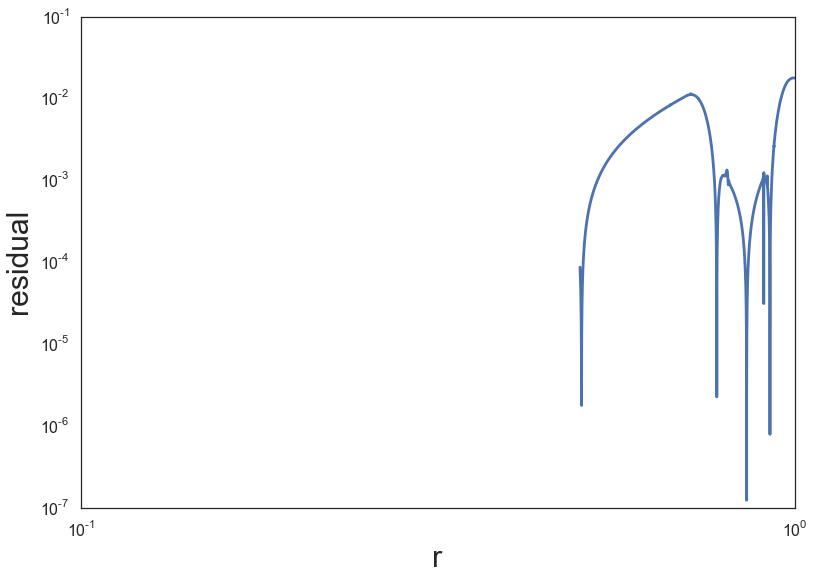

In [355]:
plt.loglog(r_array[-1, 1:], np.abs(residual_array))
plt.ylabel('residual', fontsize=30)
plt.xlabel('r', fontsize=30)
plt.yscale('log')
plt.show()

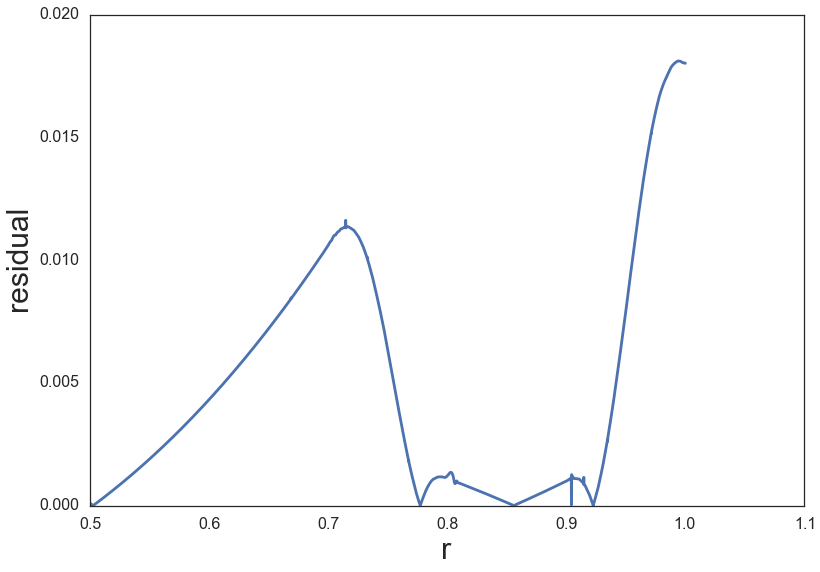

In [356]:
plt.plot(r_array[-1, 1:], np.abs(residual_array))
plt.ylabel('residual', fontsize=30)
plt.xlabel('r', fontsize=30)
plt.show()